# Importing Libraries

In [1]:
%reset -f

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import stats
import seaborn as sns

# Data Loading

In [5]:
data_studentInfo=pd.read_csv("./OULAD/studentInfo.csv")
data_assesments=pd.read_csv("./OULAD/students_asses_combined.csv")
data_vle=pd.read_csv("./OULAD/vle_combined.csv")

print("Number of data points in studentInfo.csv",data_studentInfo.shape[0])
print("Number of data points in students_asses_combined.csv",data_assesments.shape[0])
print("Number of data points in vle_combined.csv",data_vle.shape[0])


Number of data points in studentInfo.csv 32593
Number of data points in students_asses_combined.csv 32593
Number of data points in vle_combined.csv 32593


In [6]:
columns_info=data_studentInfo.columns
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass


In [7]:
data_assesments.pop("Unnamed: 0")
columns_asses=data_assesments.columns
data_assesments.head()

,code_module,code_presentation,id_student,CS20,CS40,CS60,CS80,CS100,PCS20,PCS40,...,LS40,LS60,LS80,LS100,RS20,RS40,RS60,RS80,RS100,date_registration
0,AAA,2013J,11391,7.8,24.8,40.8,57.8,82.4,7.800000e+01,8.266667e+01,...,0,0,0,0,78.0,81.5,81.000000,82.00,82.0,-159.0
1,AAA,2013J,28400,7.0,20.6,34.6,47.4,65.4,7.000000e+01,6.866667e+01,...,1,2,2,2,70.0,69.0,69.333333,68.00,66.4,-53.0
2,AAA,2013J,30268,0.0,0.0,0.0,0.0,0.0,1.000000e-15,3.333333e-16,...,0,0,0,0,0.0,0.0,0.000000,0.00,0.0,-92.0
3,AAA,2013J,31604,7.2,21.4,36.2,53.8,76.3,7.200000e+01,7.133333e+01,...,0,0,0,0,72.0,71.5,72.333333,76.25,76.0,-52.0
4,AAA,2013J,32885,6.9,12.9,25.5,32.5,55.0,6.900000e+01,4.300000e+01,...,2,3,4,5,69.0,49.5,54.000000,49.25,54.4,-176.0


In [8]:
data_vle.pop("Unnamed: 0")
columns_vle=data_vle.columns
data_vle.head()

,code_module,code_presentation,id_student,sum_clicks0,sum_clicks20,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,147,528,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,263,669,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,102,281,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,169,799,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,295,601,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


# Data Merging

In [9]:
data_studentInfo=pd.merge(data_studentInfo, data_assesments, how='left', on=['code_module','code_presentation','id_student'])
data_studentInfo=pd.merge(data_studentInfo, data_vle, how='left', on=['code_module','code_presentation','id_student'])
data_studentInfo.head()

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,sum_clicks40,sum_clicks60,sum_clicks80,sum_clicks100,mean_clicks0,mean_clicks20,mean_clicks40,mean_clicks60,mean_clicks80,mean_clicks100
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,...,628,713,791,934,6.904545,4.723002,4.206386,4.415033,4.424001,4.250956
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,...,874,1063,1417,1435,3.287954,3.154050,2.857137,2.625161,2.798992,2.732375
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,...,281,281,281,281,2.491162,3.469192,3.469192,3.469192,3.469192,3.469192
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,...,1181,1550,1896,2158,3.624762,2.956942,3.139172,3.025253,2.986959,3.007250
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,...,742,826,913,1034,3.954785,3.510630,3.285475,3.027455,2.813736,2.685387


In [10]:
data_studentInfo[data_studentInfo["imd_band"]=='?'].shape
mode_imd=stats.mode(data_studentInfo["imd_band"].values)[0][0]

for ind in range(0,data_studentInfo.shape[0]):
    
    if data_studentInfo.iloc[[ind]]["imd_band"].values[0]=='?':
        data_studentInfo.at[ind,"imd_band"]=mode_imd
    

# Exploratory Data Analysis (EDA)

In [11]:
dum=data_studentInfo.groupby(['id_student'])['id_student'].count().values

unique_elements, counts_elements = np.unique(dum, return_counts=True)

print("count of student with multiple courses:")
count_courses={}
for i in range(0,len(unique_elements)):
    count_courses[unique_elements[i]]=[counts_elements[i]]

count_courses=pd.DataFrame(count_courses,index=["Number of courses"])
display(count_courses)


count of student with multiple courses:


,1,2,3,4,5
Number of courses,25247,3293,221,23,1


Text(0.5, 1.0, 'total number of students with different education levels')

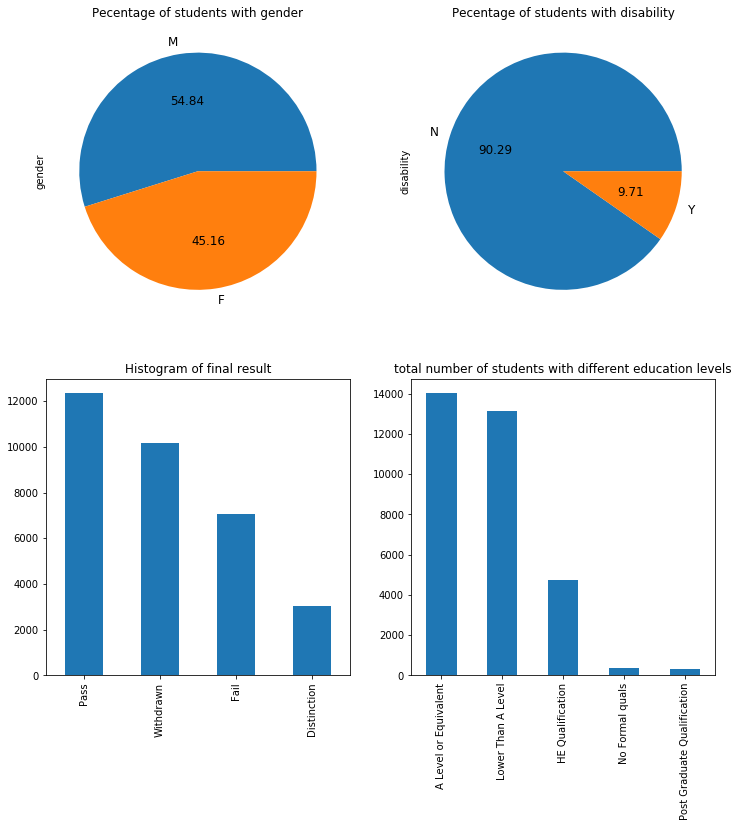

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,12))
plt.subplot(221)
g=data_studentInfo.gender.value_counts()/len(data_studentInfo.gender)
g.plot.pie(autopct='%.2f', fontsize=12)
plt.title("Pecentage of students with gender")

plt.subplot(223)
data_studentInfo['final_result'].value_counts().plot.bar()
plt.title("Histogram of final result")

plt.subplot(222)
d=data_studentInfo.disability.value_counts()/len(data_studentInfo.disability)
d.plot.pie(autopct='%.2f', fontsize=12)
plt.title("Pecentage of students with disability")

plt.subplot(224)
data_studentInfo['highest_education'].value_counts().plot.bar()
plt.title("total number of students with different education levels")



Observation:

1. From the above figure it is clear that the percentage of male students are higher than female students and the percentage of students with no disablility are higher.
2. The count of final result is more for pass follwed by withdrawn, fail and distinction.
3. The student count of highest education for A level or equivalent is higher when compared with different education levels



A Level or Equivalent


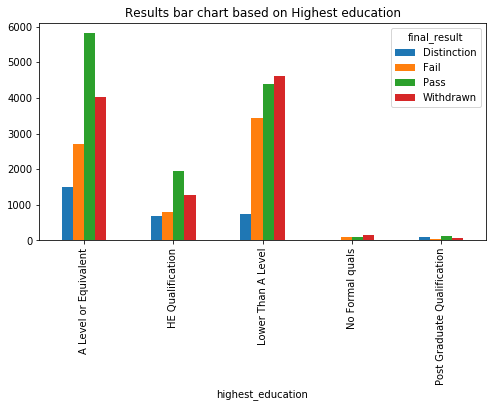

In [13]:
edu_details=data_studentInfo.groupby(['highest_education'])['highest_education'].count()
labels=edu_details.keys().values
print(labels[0])

data_studentInfo.groupby(['highest_education','final_result']).size().unstack().plot(kind='bar', title='Results bar chart based on Highest education',figsize=(8,4))
plt.show()

Observation: The pass count of final result is higher for highest education A level or Equivalent whereas the withdrawn count is higher for Lower than A level education.

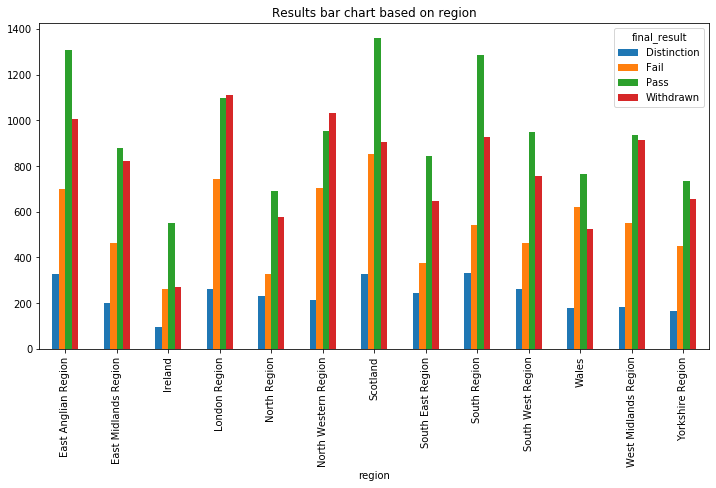

In [14]:
data_studentInfo.groupby(['region','final_result']).size().unstack().plot(kind='bar', title='Results bar chart based on region',figsize=(12,6))
plt.show()

Observation: The Pass count is high in scotland region whereas the fail count is less in Ireland region.

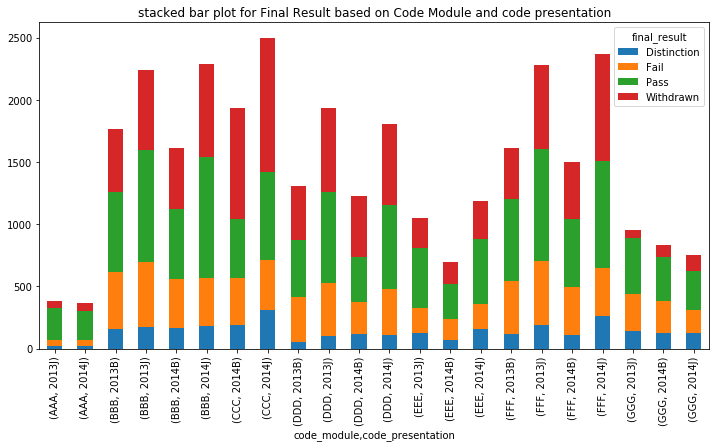

In [15]:
data_studentInfo.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar', stacked=True, title='stacked bar plot for Final Result based on Code Module and code presentation',figsize=(12,6))
plt.show()

Observation: From the above stacked bar plot, we could see the withdrawn count is higher for code module CCC and code presentation 2014J

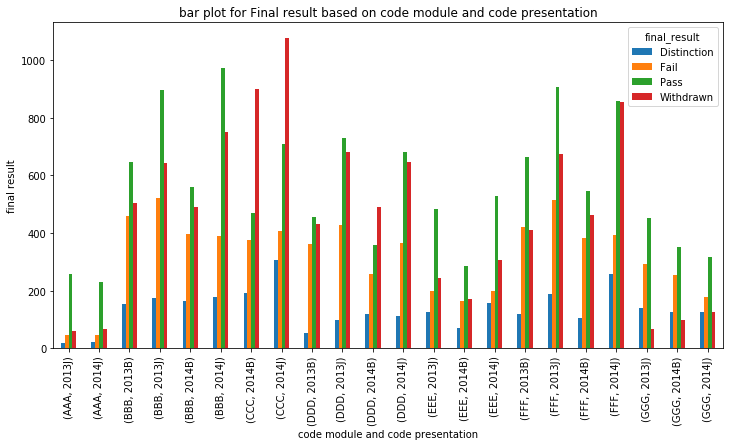

In [16]:
data_studentInfo.groupby(['code_module','code_presentation','final_result']).size().unstack().plot(kind='bar',figsize=(12,6))
plt.xlabel('code module and code presentation')
plt.ylabel('final result')
plt.title('bar plot for Final result based on code module and code presentation')
plt.show()

Observation: From the above bar plot, it is clear that the module AAA, 2013J has least number of students compared with other code module and code presentations. 

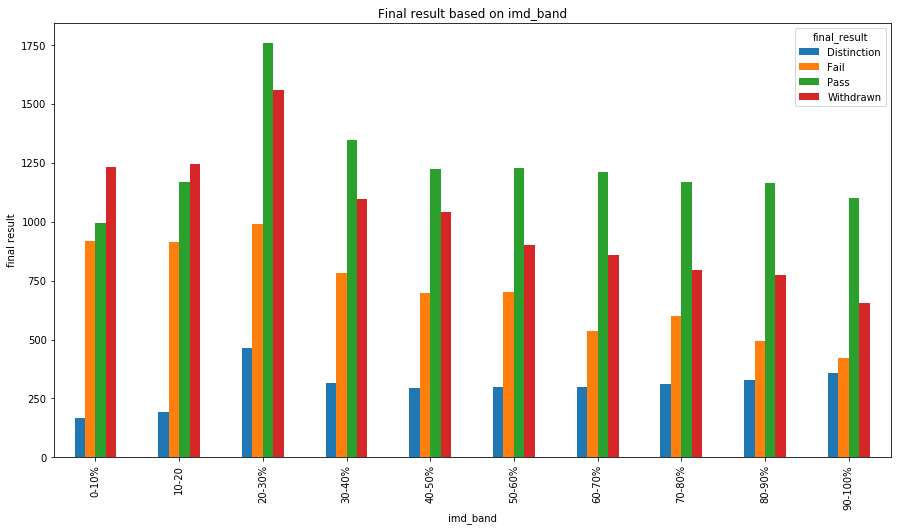

In [17]:
data_studentInfo.groupby(['imd_band','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('imd_band')
plt.ylabel('final result')
plt.title('Final result based on imd_band')
plt.show()

Observation: From the above 

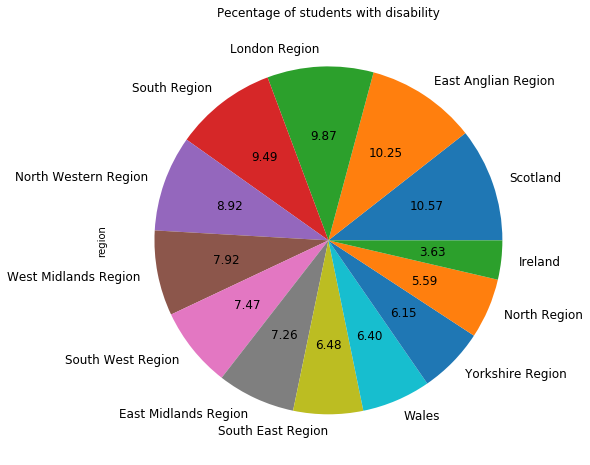

In [18]:
d=data_studentInfo.region.value_counts()/len(data_studentInfo.disability)
d.plot.pie(autopct='%.2f', fontsize=12,figsize=(10,8))
plt.title("Pecentage of students with disability")
plt.show()

Observation: The above pie chart shows the percentage of students with disability. The scotland region has more number of students with disability followed by East Anglian and London regions.

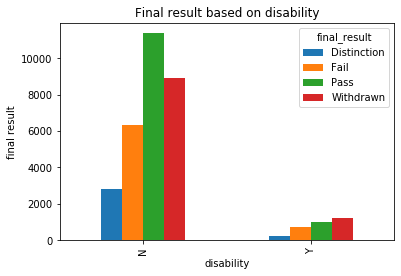

In [19]:
data_studentInfo.groupby(['disability','final_result']).size().unstack().plot(kind='bar')
plt.xlabel('disability')
plt.ylabel('final result')
plt.title('Final result based on disability')
plt.show()

Observation: The above bar plot shows the number of students with disability. From the plot it is clear that there are more number of students without disability and the pass count is higher.

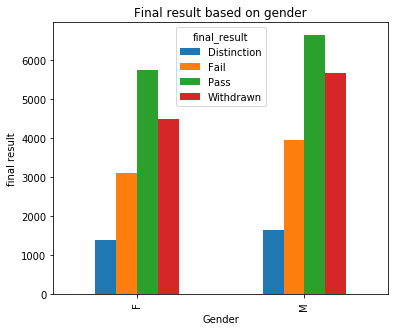

In [20]:
data_studentInfo.groupby(['gender','final_result']).size().unstack().plot(kind='bar',figsize=(6,5))
plt.xlabel('Gender')
plt.ylabel('final result')
plt.title('Final result based on gender')
plt.show()

observation: There are more number of male students compared with the female students and the pass count is higher followed by withdrawn, fail and distinction.

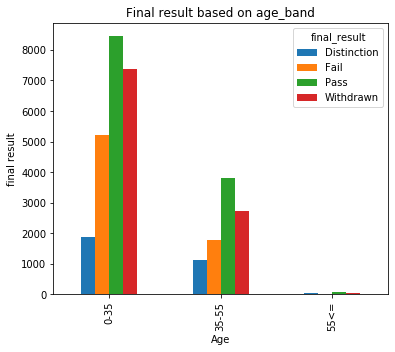

In [21]:
data_studentInfo.groupby(['age_band','final_result']).size().unstack().plot(kind='bar',figsize=(6,5))
plt.xlabel('Age')
plt.ylabel('final result')
plt.title('Final result based on age_band')
plt.show()

Observation: The above figure shows the final result based on age band and there are more number of students with age band of 0-35 followed by 35-55. The number of students with the age band of 55 are negligible.

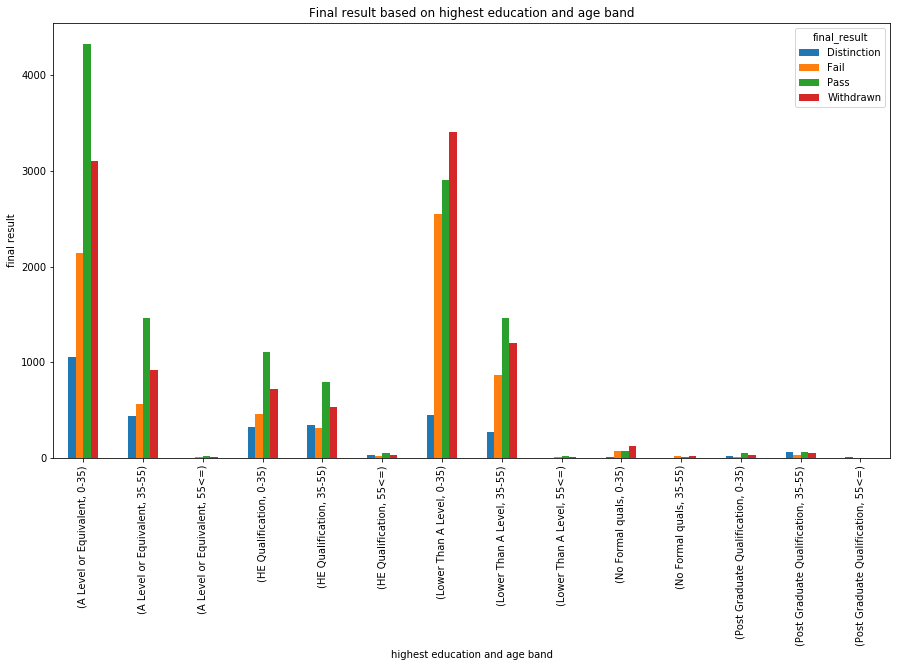

In [22]:
data_studentInfo.groupby(['highest_education','age_band','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('highest education and age band')
plt.ylabel('final result')
plt.title('Final result based on highest education and age band')
plt.show()

Observation: From the above figure, we could see that the pass count is high for the education A Level or Equivalent, with the age group of 0-35 years, whereas the HE qualification education level with the age band of 55<= has the least count.

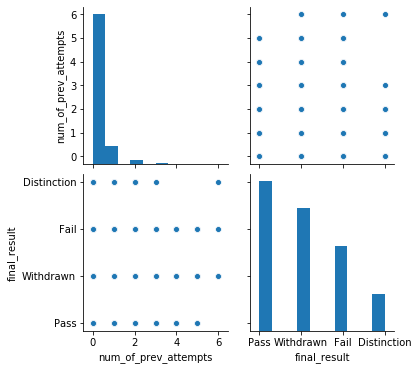

In [30]:
import seaborn as sns
g = sns.pairplot(data_studentInfo, vars = ["num_of_prev_attempts","final_result"])

<Figure size 864x216 with 0 Axes>

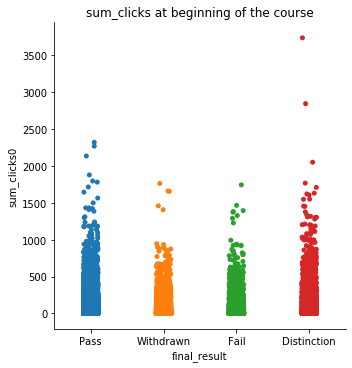

<Figure size 864x216 with 0 Axes>

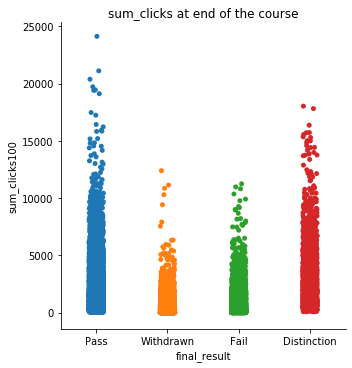

In [23]:
plt.figure(figsize=(12,3))
sns.catplot(x='final_result',y='sum_clicks0',data=data_studentInfo)
plt.title("sum_clicks at beginning of the course")
plt.show()
plt.figure(figsize=(12,3))
sns.catplot(x='final_result',y='sum_clicks100',data=data_studentInfo)
plt.title("sum_clicks at end of the course")
plt.show()

Observation:

1. Gives the information about the sum clicks at the beginning of the course. Final result Distinction has more number of outliers. 
2. Gives the information about the sum clicks at the end of the course. Final result pass has more number of outliers. 


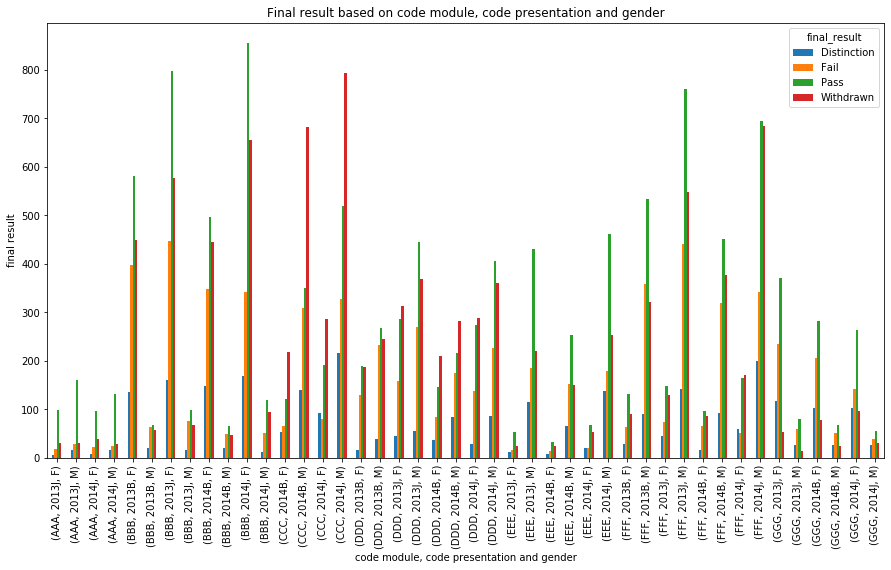

In [24]:
data_studentInfo.groupby(['code_module','code_presentation','gender','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('code module, code presentation and gender')
plt.ylabel('final result')
plt.title('Final result based on code module, code presentation and gender')
plt.show()

Observation : From the above figure, we could see that the pass count for the code module BBB, Code presentation 2014B for the Female is higher when compared to others.

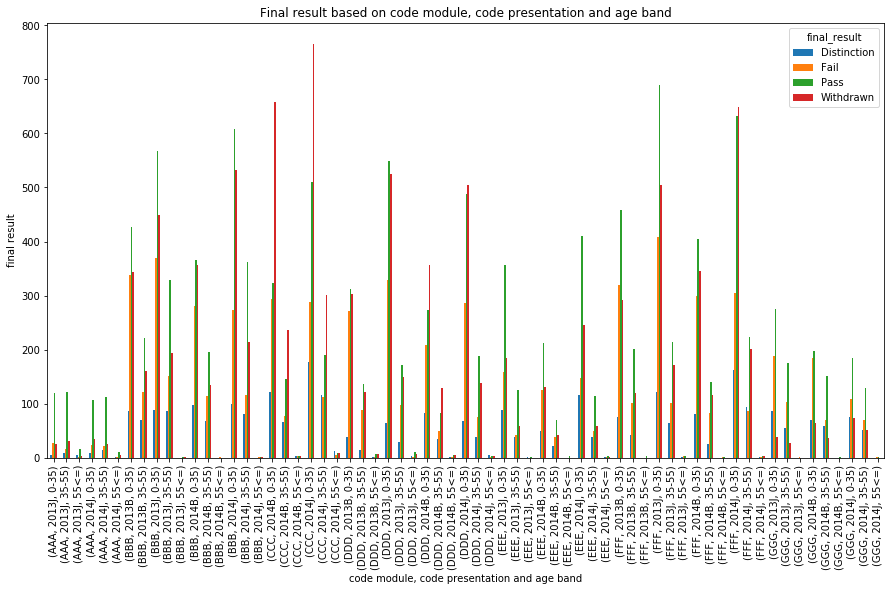

In [25]:
data_studentInfo.groupby(['code_module','code_presentation','age_band','final_result']).size().unstack().plot(kind='bar',figsize=(15,8))
plt.xlabel('code module, code presentation and age band')
plt.ylabel('final result')
plt.title('Final result based on code module, code presentation and age band')
plt.show()

Observation : From the above figure, we could see that the withdrawn count for the code module CCC, Code presentation 2014J and for the age group of (0-35) years is higher when compared to others.

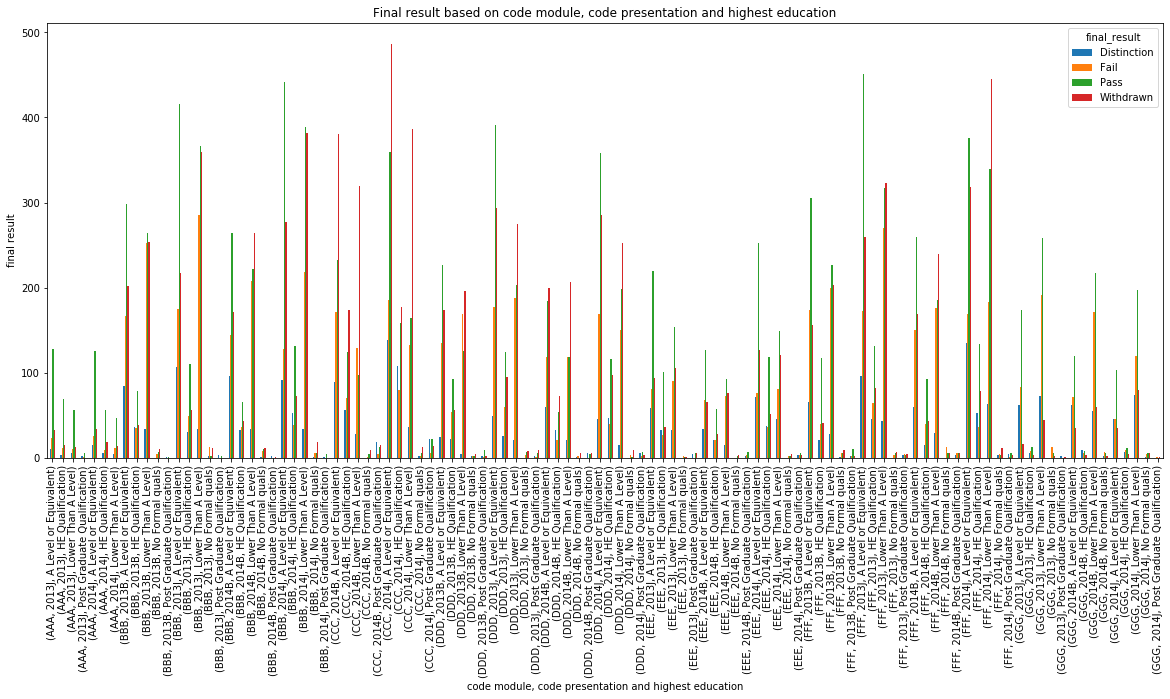

In [26]:
data_studentInfo.groupby(['code_module','code_presentation','highest_education','final_result']).size().unstack().plot(kind='bar',figsize=(20,8))
plt.xlabel('code module, code presentation and highest education')
plt.ylabel('final result')
plt.title('Final result based on code module, code presentation and highest education')
plt.show()

Observation : From the above figure, we could see that the withdrawn count for the code module CCC, Code presentation 2014J and for the highest education A level or Equivalent is higher when compared to others.


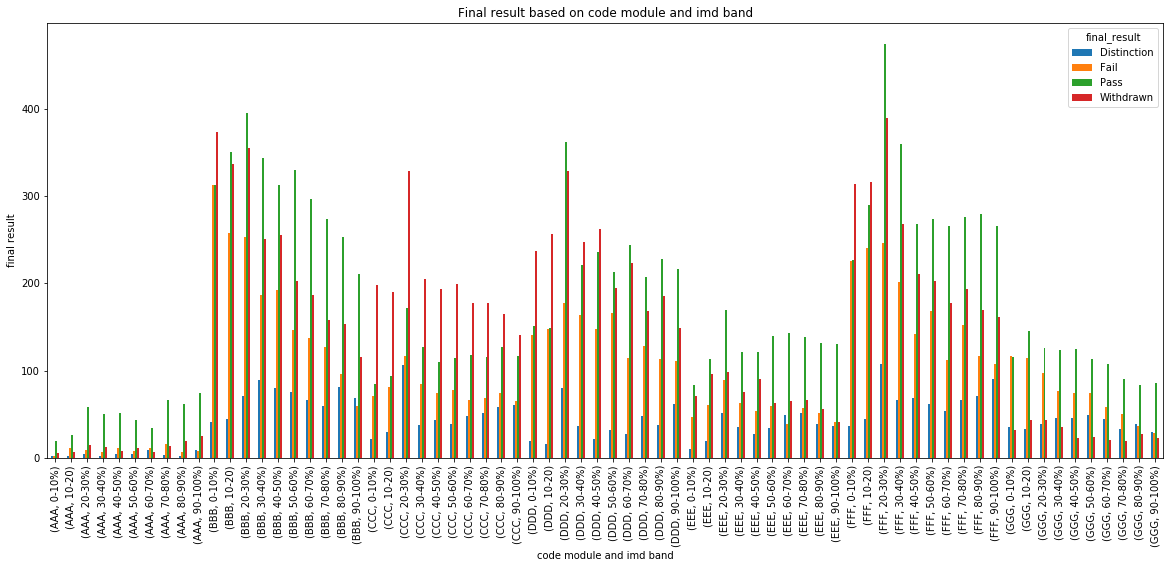

In [27]:
data_studentInfo.groupby(['code_module','imd_band','final_result']).size().unstack().plot(kind='bar',figsize=(20,8))
plt.xlabel('code module and imd band')
plt.ylabel('final result')
plt.title('Final result based on code module and imd band')
plt.show()

Observation : From the above figure, we could see that the withdrawn count for the code module CCC, Code presentation 2014J and for the highest education A level or Equivalent is higher when compared to others.

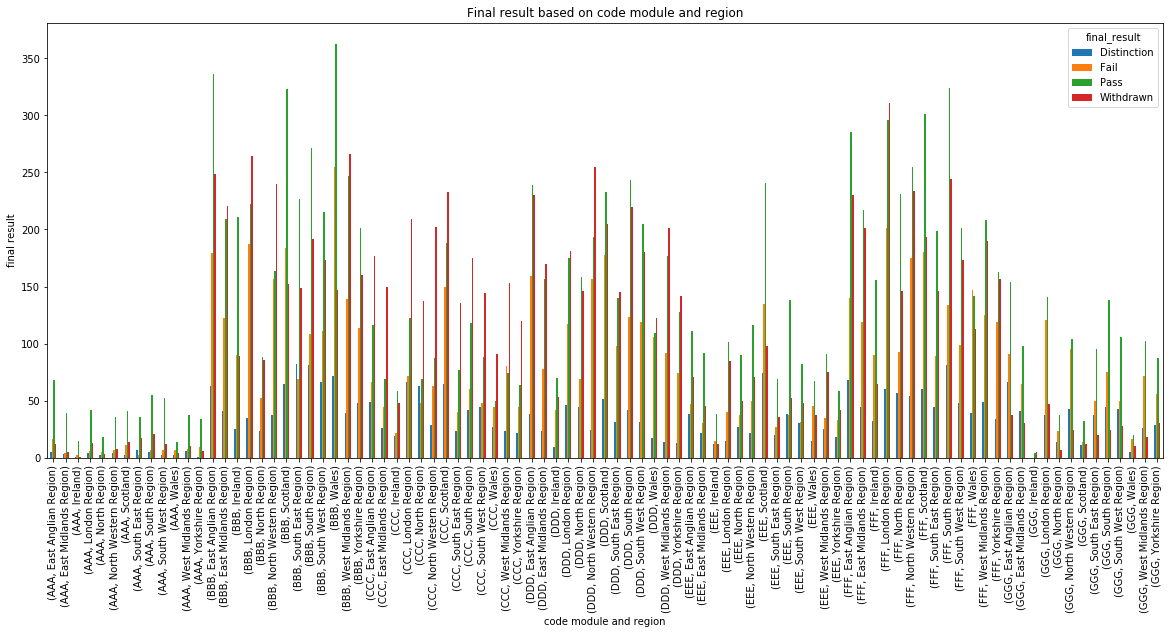

In [28]:
data_studentInfo.groupby(['code_module','region','final_result']).size().unstack().plot(kind='bar',figsize=(20,8))
plt.xlabel('code module and region')
plt.ylabel('final result')
plt.title('Final result based on code module and region')
plt.show()